# Phrase

In [1]:
sentence = "The little bear saw the fat trout in the book"

In [100]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

In [6]:
tagged = pos_tag(word_tokenize(sentence))

In [7]:
tagged   # 리스트 속 튜플

[('The', 'DT'),
 ('little', 'JJ'),
 ('bear', 'NN'),
 ('saw', 'VBD'),
 ('the', 'DT'),
 ('fat', 'JJ'),
 ('trout', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('book', 'NN')]

In [8]:
from nltk.help import upenn_tagset

In [11]:
upenn_tagset("N,*")

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
NNPS: noun, proper, plural
    Americans Americas Amharas Amityvilles Amusements Anarcho-Syndicalists
    Andalusians Andes Andruses Angels Animals Anthony Antilles Antiques
    Apache Apaches Apocrypha ...
NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...


In [13]:
from nltk.chunk.regexp import RegexpParser

grammar = RegexpParser("NP: {<DT>?<NN.*>}")
pharseTree = grammar.parse(tagged)
# DT : 한정사
# ? : 있을 수도 있고 없을 수도 있고
# DT NN / NN / NNP / DT NNP 모두 다 가능함

In [15]:
pharseTree.pprint()

(S
  The/DT
  little/JJ
  (NP bear/NN)
  saw/VBD
  the/DT
  fat/JJ
  (NP trout/NN)
  in/IN
  (NP the/DT book/NN))


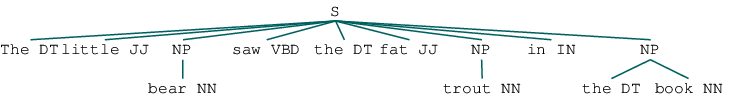

In [18]:
# Tree 출력 
pharseTree
# pharseTree.draw() 하면 새로운 창에 뜸 

In [26]:
sentence = "The little yellow dog barked at the cat"

tagged = pos_tag(word_tokenize(sentence))

grammar = RegexpParser("""
    NP : {<DT>?<JJ.*>*<NN.*>}
""")
# ? = True or False ( 있거나 없거나 딱 1개)
#  * = 0 : * ( 없거나 여러개 있거나 )
# + = 1 : * ( 1개 있거나, 여러개 있거나 )
grammar.parse(tagged).pprint()
Tree = grammar.parse(tagged)

(S
  (NP The/DT little/JJ yellow/JJ dog/NN)
  barked/VBD
  at/IN
  (NP the/DT cat/NN))


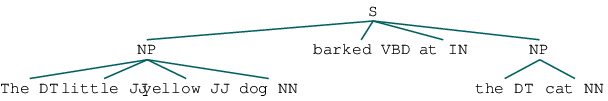

In [27]:
Tree

# 한글적용

In [53]:
# 꼬마
from konlpy.tag import Kkma

sentence = "내 친구가 잠을 많이 잔다."
tagged = Kkma().pos(sentence)

In [54]:
tagged

[('내', 'NP'),
 ('친구', 'NNG'),
 ('가', 'JKS'),
 ('잠', 'NNG'),
 ('을', 'JKO'),
 ('많이', 'MAG'),
 ('자', 'VV'),
 ('ㄴ다', 'EFN'),
 ('.', 'SF')]

In [55]:
rules = RegexpParser("""
    NP : {<N.*>+<J.*>?}
    VP : {<M.*>?<VV.*><E.*>}    
""")
# 부사(M)은 있거나 없거나

In [57]:
# 한글이라 draw해야 한글 나옴 
parseTree = rules.parse(tagged).draw()
parseTree

In [39]:
type(parseTree)

nltk.tree.Tree

In [41]:
for subTree in parseTree.subtrees():
    if subTree.label() == "NP":
        print(subTree)

(NP 내/NP 친구/NNG 가/JKS)
(NP 잠/NNG 을/JKO)


## Exercise

### 1. I shot an elephant in my pajamas

In [382]:
sentence = "I shot an elephant in my pajamas"

tagged = pos_tag(word_tokenize(sentence))

In [383]:
tagged

[('I', 'PRP'),
 ('shot', 'VBP'),
 ('an', 'DT'),
 ('elephant', 'NN'),
 ('in', 'IN'),
 ('my', 'PRP$'),
 ('pajamas', 'NN')]

In [384]:
# 아래서부터 위로 정의해야함 
rules = RegexpParser("""
    Det : {<DT>?<PRP.+>?}
    N : {<NN.*>}
    NP : {<Det><N>}
    V : {<VBP>}
    P : {<I.*>}
    VP : {<V><NP>}
    NP : {<P><NP>}
    VP : {<VP><NP>}
""")
rules.parse(tagged).pprint()

(S
  I/PRP
  (VP
    (VP (V shot/VBP) (NP (Det an/DT) (N elephant/NN)))
    (NP (P in/IN) (NP (Det my/PRP$) (N pajamas/NN)))))


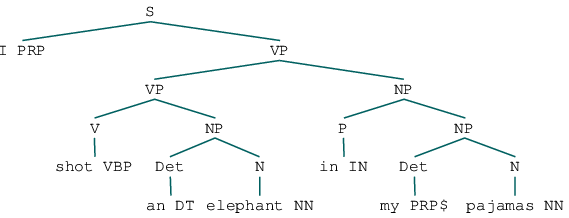

In [385]:
rules.parse(tagged)

### 2. the dog saw a man in the park

In [368]:
sentence = "the dog saw a man in the park"

tagged = pos_tag(word_tokenize(sentence))

In [369]:
tagged

[('the', 'DT'),
 ('dog', 'NN'),
 ('saw', 'VBD'),
 ('a', 'DT'),
 ('man', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('park', 'NN')]

In [377]:
rules = RegexpParser("""
    Det : {<DT>}
    N : {<NN>}
    V : {<VBD>}
    P : {<IN>}
    NP : {<Det><N>}
    PP : {<P><NP>}
    VP : {<V><NP>}
""")

rules.parse(tagged).pprint()

(S
  (NP (Det the/DT) (N dog/NN))
  (VP (V saw/VBD) (NP (Det a/DT) (N man/NN)))
  (PP (P in/IN) (NP (Det the/DT) (N park/NN))))


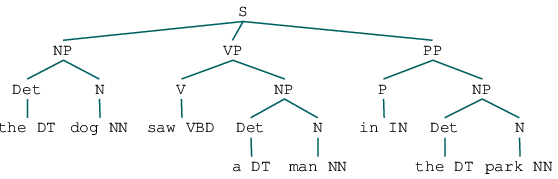

In [378]:
rules.parse(tagged)

### 3. the angry bear chased the frightened little squirrel

In [379]:
sentence = "the angry bear chased the frightened little squirrel"

tagged = pos_tag(word_tokenize(sentence))

In [380]:
tagged

[('the', 'DT'),
 ('angry', 'JJ'),
 ('bear', 'NN'),
 ('chased', 'VBD'),
 ('the', 'DT'),
 ('frightened', 'JJ'),
 ('little', 'JJ'),
 ('squirrel', 'NN')]

In [ ]:
rules = RegexpParser("""
    
""")

### 4. 

# WordCloud 그리기

In [387]:
from konlpy.corpus import kolaw

corpus = kolaw.open(kolaw.fileids()[0]).read()
tagged = Kkma().pos(corpus)

In [390]:
result =[]
# 조사 제거
for _ in tagged: 
    if len(_[0]) > 1 and not _[1].startswith("J"):
        result.append(_[0])

In [392]:
from nltk import Text

textObj = Text(result)

In [402]:
termList = textObj.vocab()

In [417]:
from wordcloud import WordCloud

path = "/Library/Fonts/AppleGothic.ttf"
wc = WordCloud(font_path=path,max_words=30,background_color="white")

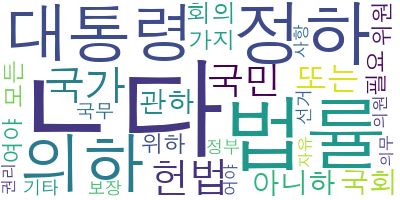

In [418]:
wc.generate_from_frequencies(termList)
wc.to_image()

In [420]:
# Array로도 뽑을 수 있음 
temp = wc.to_array()

# 수집한 데이터 이용

In [450]:
import os
corpus = ""
for file in os.listdir("./News"):
    if file.endswith(".txt") and file.startswith("IT과학"):
        with open("./News/" + file, encoding='utf-8') as f:
            corpus += f.read()



In [451]:
tagged=[]
for _ in word_tokenize(corpus):
    tagged.extend(Kkma().nouns(_))

In [452]:
from collections import defaultdict

nounList = defaultdict(int)
for _ in tagged:
    nounList[_] += 1

In [453]:
len(nounList), len(set(nounList))

(2871, 2871)

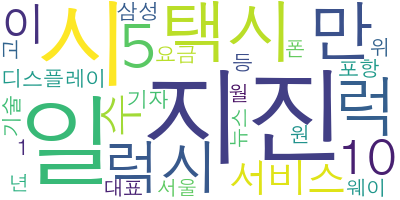

In [454]:
wc.generate_from_frequencies(nounList)
wc.to_image()

# Virginia

http://www.cs.virginia.edu/~hw5x/Course/IR2015/_site/lectures/